In [7]:
!pip install matplotlib seaborn pandas

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Step 1: Import libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, count
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# Step 2: Initialize Spark
spark = SparkSession.builder.appName("ElectricVehiclesAnalysis").getOrCreate()

In [19]:
import os
print(os.getcwd())

C:\Users\user\OneDrive\Desktop\BDA\Mini project


In [24]:
# Step 3: Load dataset
df = spark.read.csv(
    "file:///C:/Users/user/OneDrive/Desktop/BDA/Mini project/electric_vehicles_dataset.csv",
    header=True,
    inferSchema=True
)



In [25]:
# Step 4: Show schema and sample
df.printSchema()
df.show(5)


root
 |-- Vehicle_ID: integer (nullable = true)
 |-- Manufacturer: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Battery_Type: string (nullable = true)
 |-- Battery_Capacity_kWh: double (nullable = true)
 |-- Range_km: integer (nullable = true)
 |-- Charging_Type: string (nullable = true)
 |-- Charge_Time_hr: double (nullable = true)
 |-- Price_USD: double (nullable = true)
 |-- Color: string (nullable = true)
 |-- Country_of_Manufacture: string (nullable = true)
 |-- Autonomous_Level: double (nullable = true)
 |-- CO2_Emissions_g_per_km: double (nullable = true)
 |-- Safety_Rating: double (nullable = true)
 |-- Units_Sold_2024: integer (nullable = true)
 |-- Warranty_Years: integer (nullable = true)

+----------+------------+--------------------+----+--------------------+--------------------+--------+--------------------+--------------+---------+-------------+----------------------+----------------+----------------------+------

In [26]:
# Step 5: Basic statistics
df.describe().show()

+-------+-----------------+------------+-------------+------------------+------------+--------------------+------------------+--------------------+------------------+-----------------+-----------+----------------------+------------------+----------------------+------------------+------------------+------------------+
|summary|       Vehicle_ID|Manufacturer|        Model|              Year|Battery_Type|Battery_Capacity_kWh|          Range_km|       Charging_Type|    Charge_Time_hr|        Price_USD|      Color|Country_of_Manufacture|  Autonomous_Level|CO2_Emissions_g_per_km|     Safety_Rating|   Units_Sold_2024|    Warranty_Years|
+-------+-----------------+------------+-------------+------------------+------------+--------------------+------------------+--------------------+------------------+-----------------+-----------+----------------------+------------------+----------------------+------------------+------------------+------------------+
|  count|             3022|        3022|   

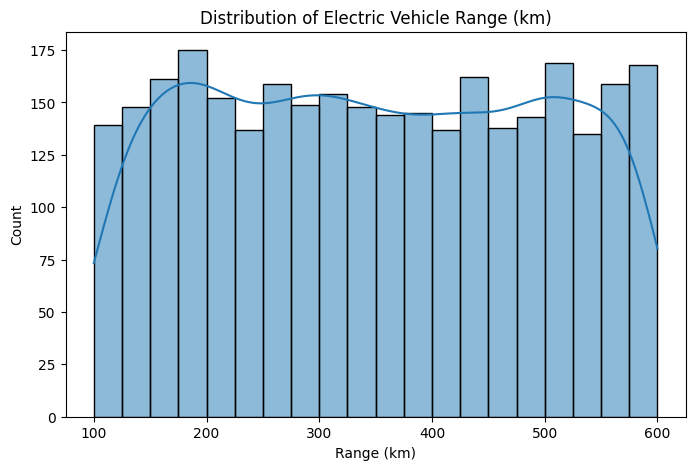

In [28]:
# Step 6: Relationship 1 - Distribution of Electric Range
pdf = df.select("Range_km").dropna().toPandas()

plt.figure(figsize=(8,5))
sns.histplot(pdf["Range_km"], bins=20, kde=True)
plt.title("Distribution of Electric Vehicle Range (km)")
plt.xlabel("Range (km)")
plt.ylabel("Count")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_12712\2255991569.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


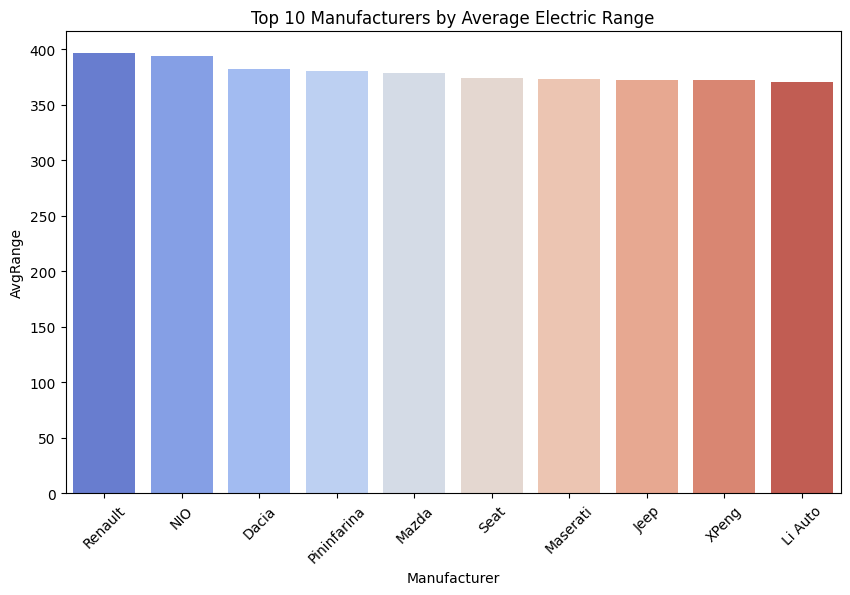

In [35]:
# Step 7: Relationship 2 - Average Electric Range per Make
avg_range = df.groupBy("Manufacturer").agg(avg("Range_km").alias("AvgRange")).orderBy(col("AvgRange").desc())
avg_range_pandas = avg_range.toPandas()
plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_range_pandas.head(10), 
    x="Manufacturer", 
    y="AvgRange", 
    palette="coolwarm", 
    hue=None, 
    legend=False
)

plt.title("Top 10 Manufacturers by Average Electric Range")
plt.xticks(rotation=45)
plt.show()

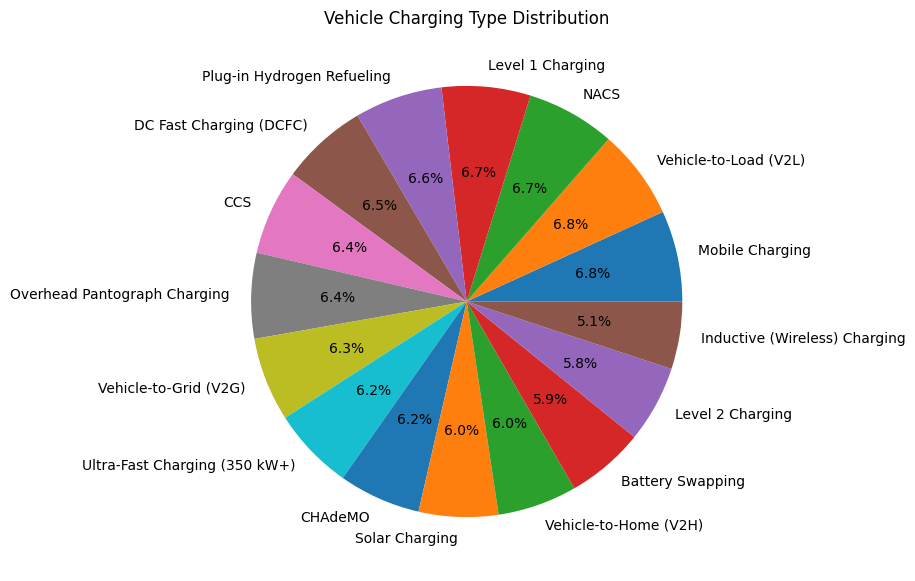

In [39]:
# Step 8: Relationship 3 - Count of Vehicles by Vehicle Type
from pyspark.sql.functions import count, col
import matplotlib.pyplot as plt

# Count of vehicles by charging type
type_count = df.groupBy("Charging_Type") \
               .agg(count("*").alias("Count")) \
               .orderBy(col("Count").desc())

# Convert to pandas for plotting
type_pandas = type_count.toPandas()

# Pie chart
plt.figure(figsize=(7,7))
plt.pie(type_pandas["Count"], labels=type_pandas["Charging_Type"], autopct="%1.1f%%")
plt.title("Vehicle Charging Type Distribution")
plt.show()


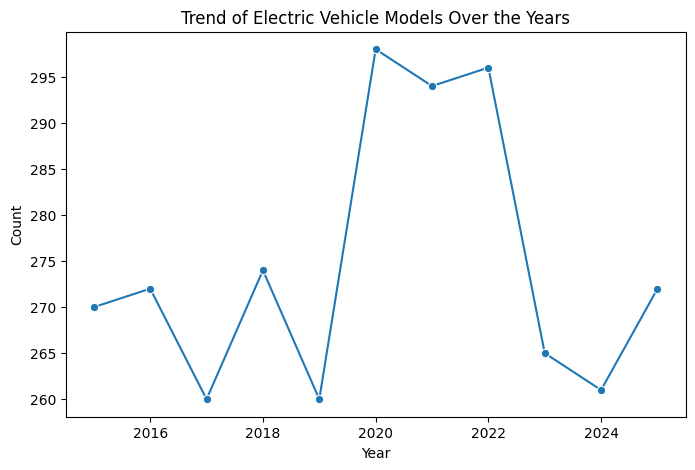

In [41]:
# Step 9: Relationship 4 - Trend of Models by Year
from pyspark.sql.functions import count, col
import matplotlib.pyplot as plt
import seaborn as sns

# Count of vehicles by Year
year_count = df.groupBy("Year") \
               .agg(count("*").alias("Count")) \
               .orderBy("Year")

# Convert to pandas for plotting
year_pandas = year_count.toPandas()

# Line plot
plt.figure(figsize=(8,5))
sns.lineplot(data=year_pandas, x="Year", y="Count", marker="o")
plt.title("Trend of Electric Vehicle Models Over the Years")
plt.show()


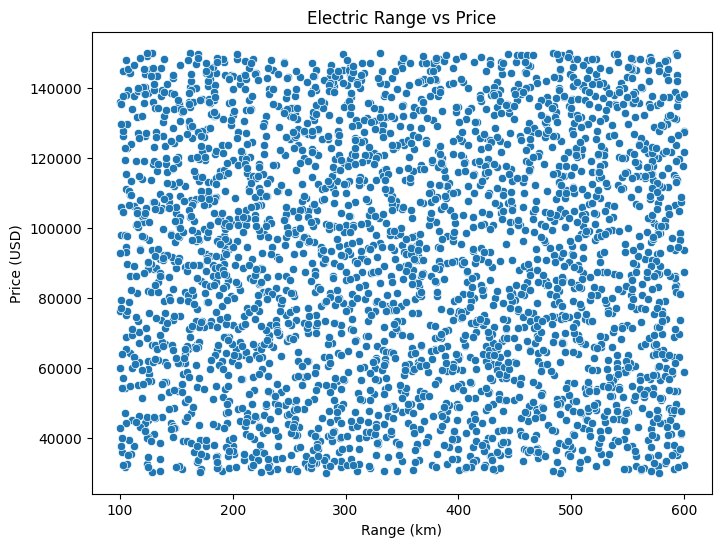

In [43]:
# Step 10: Relationship 5 - Range vs Price
# Step 10: Relationship 5 - Range vs Price
range_price = df.select("Range_km", "Price_USD").dropna().toPandas()

plt.figure(figsize=(8,6))
sns.scatterplot(data=range_price, x="Range_km", y="Price_USD")
plt.title("Electric Range vs Price")
plt.xlabel("Range (km)")
plt.ylabel("Price (USD)")
plt.show()


In [45]:
# Step 11: Text insights
from pyspark.sql.functions import avg
print("🔍 Insights:")

# Average range in km (and optionally convert to miles)
avg_range_km = df.agg(avg("Range_km")).first()[0]
avg_range_miles = avg_range_km * 0.621371
print(f"Average electric range across all models: {avg_range_miles:.2f} miles ({avg_range_km:.2f} km)")

# Since VehicleType column doesn't exist, skip that or use another column
# Example: most common Battery_Type
from pyspark.sql.functions import desc, count
most_common_battery = df.groupBy("Battery_Type").agg(count("*").alias("Count")).orderBy(desc("Count")).first()[0]
print(f"Most common battery type: {most_common_battery}")

# Top manufacturer by range
top_manufacturer = df.groupBy("Manufacturer").agg(avg("Range_km").alias("AvgRange")).orderBy(desc("AvgRange")).first()[0]
print(f"Top manufacturer by average range: {top_manufacturer}")


🔍 Insights:
Average electric range across all models: 217.42 miles (349.90 km)
Most common battery type: Lithium-titanate
Top manufacturer by average range: Renault
